In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## 1. (10 points) Problem 5.6. (You don't need to write up problem 5.5 but do consider potential effects of log transforming the data as you are doing.)

In [ ]:
x = np.load('flowCytometry.npy')
x.shape
print(np.count_nonzero(~np.isnan(x)))

9320


### a. Make a histogram of x

353.0818785


Text(0, 0.5, 'Probability Density')

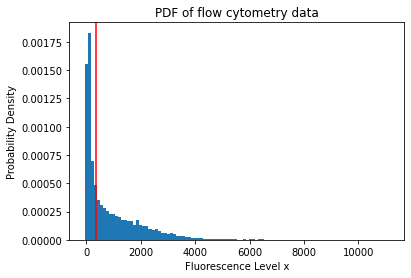

In [ ]:
counts, bins, bars = plt.hist(x, bins = 100,density=True)
print(np.nanmedian(x))

plt.axvline(x = np.nanmedian(x), color = 'r')
plt.title("PDF of flow cytometry data")
plt.xlabel('Fluorescence Level x')
plt.ylabel('Probability Density')

In [ ]:
# where is the maxima located
print(max(counts))
print(bins[np.argmax(counts, axis=0)])

0.0018311034706866621
41.448115770000015


### b. make a histogram of log10(x)

2.6376633355495307


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Probability Density')

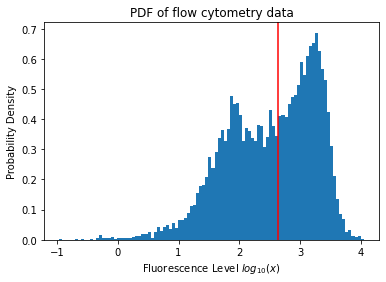

In [ ]:
logx = np.log10( x )
counts, bins, bars = plt.hist(logx, bins = 100, density=True)
print(np.nanmedian(logx))

plt.axvline(x = np.nanmedian(logx), color = 'r')
plt.title("PDF of flow cytometry data")
plt.xlabel('Fluorescence Level $log_{10}(x)$')
plt.ylabel('Probability Density')

In [ ]:
print(np.count_nonzero(~np.isnan(logx)))
print(np.sum(np.array(x) < 0, axis=0))

8751
569


In [ ]:
# the highest peak
print(max(counts))
print(bins[np.argmax(counts, axis=0)])

0.6866841818904005
3.2447199838175247


In [ ]:
# the second highest peak
print(max(counts[40:60]))
print(bins[np.where(counts == max(counts[40:60]))])

0.4768006445684176
[1.8421976]


## 2. (10 points) Problem 5.7

### a. 1/x histogram

In [ ]:
# generate 10,000 Uniformly distributed real numbers x between 0 and 1
x_list = np.random.uniform(low=0.0, high=1.0, size=10000)

# find their reciprocals 1/x
x_reciprocals = 1 / x_list

Text(0, 0.5, 'observed frequencies')

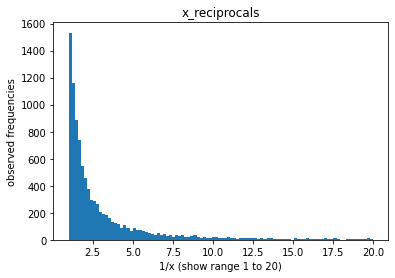

In [ ]:
# make a histogram of the results
# bins = 100, range
plt.hist(x_reciprocals, bins = 100, range=(1,20))
plt.title("x_reciprocals")
plt.xlabel('1/x (show range 1 to 20)')
plt.ylabel('observed frequencies')

### b. log-log plot

Text(0, 0.5, 'observed frequencies')

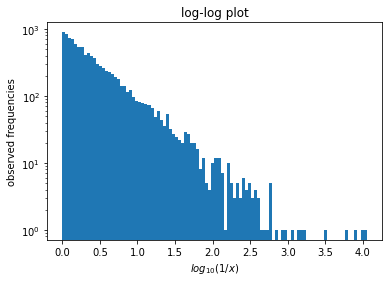

In [ ]:
plt.hist(np.log10(x_reciprocals), log=True, bins=100)
plt.title("log-log plot")
plt.xlabel('$log_{10}(1/x)$')
plt.ylabel('observed frequencies')

Text(0, 0.5, 'observed frequencies')

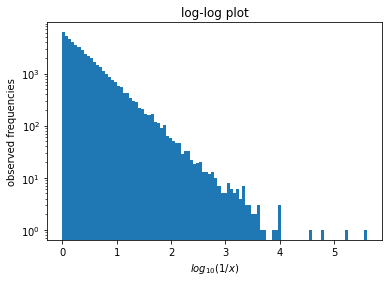

In [ ]:
# generate 10,000 Uniformly distributed real numbers x between 0 and 1
x_list = np.random.uniform(low=0.0, high=1.0, size=50000)

plt.hist(np.log10(1/x_list), log=True, bins=100)
plt.title("log-log plot")
plt.xlabel('$log_{10}(1/x)$')
plt.ylabel('observed frequencies')

## 3. (5 points) Problem 5.17 (a-e). (You don't need to write up problem 5.3

### a. Make a graph of the Cauchy distribution

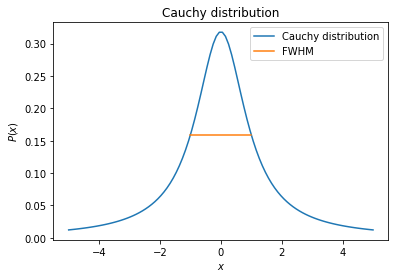

In [ ]:
x = np.linspace(-5,5,100)

# parameters
# mu = 0, eta = 1
mu = 0
eta = 1
A = 1 / (np.pi * eta)

# PDF
Pcauchy_x = A / (1 + ((x-mu)/eta)**2)

# plot
plt.plot(x, Pcauchy_x)

# full width at half maximum (FWHM): x *2 at P(x)== 1/2 P(0)
P_x = A/2
x1, y1 = [-1, 1], [P_x, P_x]
plt.plot(x1, y1)

plt.title("Cauchy distribution")
plt.xlabel('$x$')
plt.ylabel('$P(x)$')
plt.legend(['Cauchy distribution', 'FWHM'])
plt.show()

### b. Gaussian

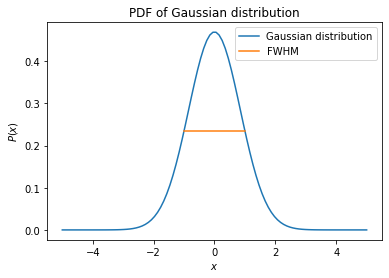

In [ ]:
x = np.linspace(-5,5,100)

# parameters
mu = 0
sigma = 1/np.sqrt(2*np.log(2))

# PDF
Pnorm = 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)/sigma)**2)

# plot
plt.plot(x, Pnorm)

# full width at half maximum (FWHM): x *2 at P(x)== 1/2 P(0)
P_x = 0.5 * (1/(sigma*np.sqrt(2*np.pi)))
x1, y1 = [-1, 1], [P_x, P_x]
plt.plot(x1, y1)

plt.title("PDF of Gaussian distribution")
plt.xlabel('$x$')
plt.ylabel('$P(x)$')
plt.legend(['Gaussian distribution', 'FWHM'])

plt.show()

### c & d. P(|x|>FWHM/2)

In [ ]:
# Cauchy P(1)=A/2
print(A/2)

# Gaussian
print(1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*((1)/sigma)**2))

0.15915494309189535
0.23485931967491286


### e. P(|x|>3/2 * FWHM)

In [ ]:
# Cauchy
x=3
print(A/(1+x**2))

# Gaussian
print(1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*(x/sigma)**2))

0.03183098861837907
0.0009174192174801292


## 4. (10 points) Problem 6.2

### a. Fig 6.2a

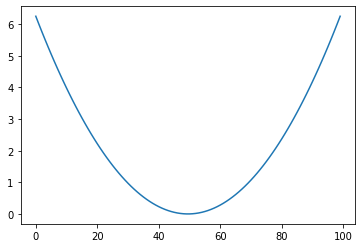

In [ ]:
x = np.linspace(0,100,100)
U_x = 0.0025 * (x - 50)**2

plt.plot(U_x)

(0.0, 100.0)

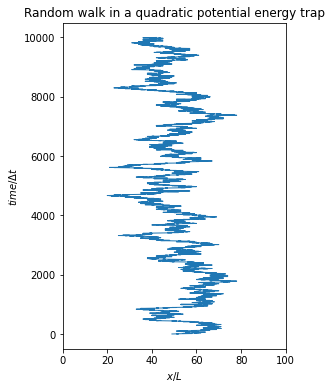

In [33]:
# release walker from the center postion
from scipy.stats import bernoulli

x_list = []
x = 50

t = 0
while t < 10000:
    if x == 0:
        P_r = 1
    elif x == 99:
        P_r = 0
    else:
        delta_U = 0.0025 * ( (x+1 - 50)**2 - (x-1 - 50)**2) ## lec 2/3/2022
        P_r = 0.5 * (1 - 0.5 * delta_U) ## eq 6.2
    # Bernoulli trial
    r = bernoulli.rvs(P_r)
    x = x - 1 + (r * 2)
    x_list.append(x)
    t += 1

plt.figure(figsize=(4, 6))
plt.plot(x_list, list(range(t)), '-', lw=1)
plt.title("Random walk in a quadratic potential energy trap")
plt.xlabel('$x/L$')
plt.ylabel('$time/\Delta t$')
plt.xlim([0, 100])

### b. animation

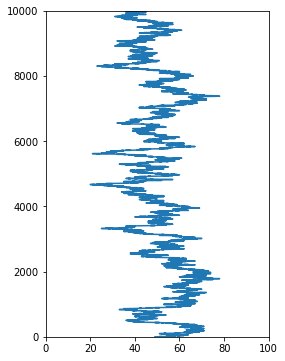

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(4, 6))
xdata, ydata = [], []
ln, = plt.plot([], [], '-')

def init():
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 10000)
    return ln,

def update(frame):
    xdata.append(x_list[frame])
    ydata.append(frame)
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=list(range(10000)),
                    init_func=init, blit=True)
ani.save('test.mp4', fps=200)

plt.show()

In [91]:
# to embed the animation
%%HTML
<div align="middle">
    <video width="80%" controls>
        <source src="./Q6.2b.mp4" type="video/mp4">
    </video>
</div>

## 5. (15 points) Problem 6.3

In [46]:
# 50,000 steps starting from x=50
# 10,000 trajectories

# populations at each spatial postion, for each time (each trajectory??)
# retain an array containing those populations
x_range = 100
total_steps = 50000

x_populations_current = np.zeros(x_range) # freq at each x position x = 0 ~ 99
x_populations_current[50] = 10000 # 10,000 walkers all start from the center x = 50
x_populations_list = []
x_populations_list.append(x_populations_current)

step = 0
while step < total_steps: # for each time step, total 50,000 steps
    # first make a new array to hold the populations at the next time step
    x_populations_new = np.zeros(x_range)
    # hard walls at the ends
    x_populations_new[1] = x_populations_current[0]
    x_populations_new[x_range-2] = x_populations_current[x_range-1]
    # consider each loation in turn
    for x in range(1, x_range-1):
        # if the population at position x is not zero
        if x_populations_current[x] != 0:
            n = x_populations_current[x]
            P_r = 0.5 - 0.25 * (0.0025 * ( (x+1 - 50)**2 - (x-1 - 50)**2)) ## eq 6.2
            right = np.random.binomial(n, P_r) # subpopulation stepping right
            # update new populations at k-1 and k+1
            x_populations_new[x+1] += right
            x_populations_new[x-1] += n - right
    x_populations_current = x_populations_new
    # copy the updated populations into the main population counter array
    x_populations_list.append(x_populations_current)
    step += 1

### a. final distribution

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   1.   0.   1.   0.   7.   0.   6.   0.  20.   0.  22.   0.  56.   0.
  64.   0. 117.   0. 162.   0. 202.   0. 303.   0. 408.   0. 481.   0.
 615.   0. 658.   0. 749.   0. 771.   0. 801.   0. 775.   0. 745.   0.
 667.   0. 573.   0. 488.   0. 401.   0. 264.   0. 234.   0. 141.   0.
 100.   0.  70.   0.  39.   0.  24.   0.  20.   0.  10.   0.   4.   0.
   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.]


Text(0, 0.5, 'Populations')

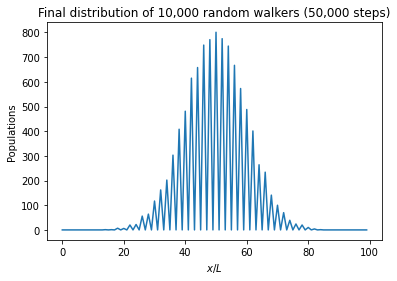

In [51]:
print(x_populations_list[-1])

plt.plot(list(range(100)), x_populations_list[-1])

plt.title("Final distribution of 10,000 random walkers (50,000 steps)")
plt.xlabel('$x/L$')
plt.ylabel('Populations')

### b. release half of the walkers at 50 and the other half at 49

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   3.   1.   3.   2.   8.  12.  18.  18.  20.  37.
  38.  49.  48.  82.  85.  83. 110. 123. 145. 187. 179. 193. 256. 253.
 282. 306. 358. 350. 333. 384. 385. 408. 358. 377. 426. 358. 393. 335.
 320. 304. 285. 277. 246. 215. 207. 197. 135. 165. 130. 103.  78.  75.
  49.  42.  43.  20.  24.  18.  12.   6.   9.  13.   6.   3.   2.   2.
   4.   1.   1.   1.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.
   0.   0.]


Text(0, 0.5, 'Populations')

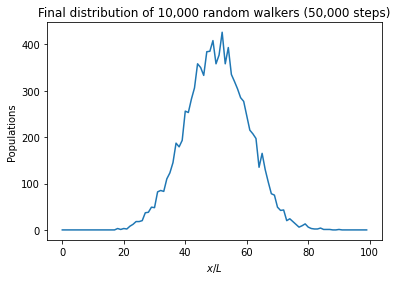

In [52]:
x_range = 100
total_steps = 50000

x_populations_current = np.zeros(x_range) # freq at each x position x = 0 ~ 99
x_populations_current[50] = 5000 # half of the walkers at 50
x_populations_current[49] = 5000 # the other half at 49

x_populations_list = []
x_populations_list.append(x_populations_current)

step = 0
while step < total_steps: # for each time step, total 50,000 steps
    # first make a new array to hold the populations at the next time step
    x_populations_new = np.zeros(x_range)
    # hard walls at the ends
    x_populations_new[1] = x_populations_current[0]
    x_populations_new[x_range-2] = x_populations_current[x_range-1]
    # consider each loation in turn
    for x in range(1, x_range-1):
        # if the population at position x is not zero
        if x_populations_current[x] != 0:
            n = x_populations_current[x]
            P_r = 0.5 - 0.25 * (0.0025 * ( (x+1 - 50)**2 - (x-1 - 50)**2)) ## eq 6.2
            right = np.random.binomial(n, P_r) # subpopulation stepping right
            # update new populations at k-1 and k+1
            x_populations_new[x+1] += right
            x_populations_new[x-1] += n - right
    x_populations_current = x_populations_new
    # copy the updated populations into the main population counter array
    x_populations_list.append(x_populations_current)
    step += 1

print(x_populations_list[-1])

plt.plot(list(range(100)), x_populations_list[-1])


plt.title("Final distribution of 10,000 random walkers (50,000 steps)")
plt.xlabel('$x/L$')
plt.ylabel('Populations')

### c. animated graphic of the time development of the probability distribution

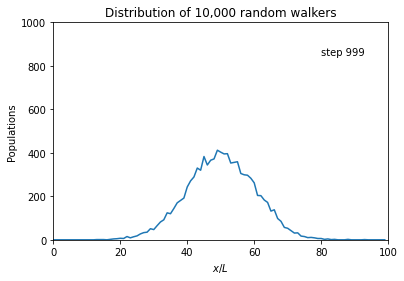

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [])

plt.title("Distribution of 10,000 random walkers")
plt.xlabel('$x/L$')
plt.ylabel('Populations')

def init():
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 1000)
    return ln,

text = ax.text(0.80, 0.85, '', transform=ax.transAxes)


def update(frame):
    xdata = list(range(100))
    ydata = x_populations_list[frame]

    ln.set_data(xdata, ydata)
    text.set_text('step %i' %(frame))
    return ln,

ani = FuncAnimation(fig, update, frames=list(range(1000)),
                    init_func=init, blit=True)
ani.save('Q6.3c.mp4', fps=24) 

plt.show()

### Shown as probability

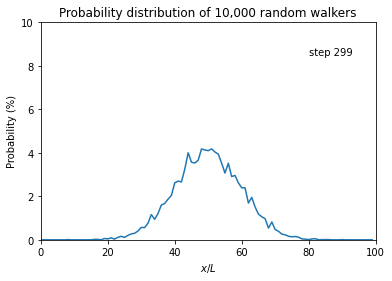

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [])

plt.title("Probability distribution of 10,000 random walkers")
plt.xlabel('$x/L$')
plt.ylabel('Probability (%)')

def init():
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 10)
    return ln,

text = ax.text(0.80, 0.85, '', transform=ax.transAxes)


def update(frame):
    xdata = list(range(100))
    ydata = np.array(x_populations_list[frame]) / 100
    ln.set_data(xdata, ydata)
    text.set_text('step %i' %(frame))
    return ln,

ani = FuncAnimation(fig, update, frames=list(range(300)),
                    init_func=init, blit=True)
ani.save('Q6.3c.mp4')

plt.show()

In [90]:
# to embed the animation
%%HTML
<div align="middle">
    <video width="80%" controls>
        <source src="./Q6.3c.mp4" type="video/mp4">
    </video>
</div>
